In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glass/glass.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# models
from sklearn.neighbors import KNeighborsClassifier

# 1. Importing data

In [3]:
main_df = pd.read_csv('/kaggle/input/glass/glass.csv')

print('Shape: ',main_df.shape,end='\n\n')
main_df.head()

Shape:  (214, 10)



,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
main_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:xlabel='RI', ylabel='Na'>

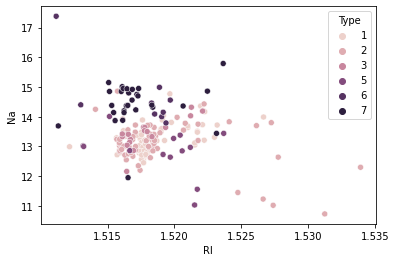

In [6]:
sns.scatterplot(x=main_df['RI'], y=main_df['Na'], hue=main_df['Type'])

# 2. Data Transformation

In [7]:
# from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
min_max.fit(main_df)
scaled_df = min_max.transform(main_df)

In [8]:
scaled_df

array([[0.43283582, 0.43759398, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.        , 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.52063492, 0.        ,
        1.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.4984127 , 0.        ,
        1.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.53015873, 0.        ,
        1.        ]])

In [9]:
# from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_df)
x_pca = pca.transform(scaled_df)

# printing the first 5 records
x_pca[:5]

array([[-0.49203312, -0.05381983],
       [-0.34058219, -0.1254387 ],
       [-0.3250198 , -0.15904709],
       [-0.36908807, -0.0913743 ],
       [-0.35809501, -0.10583815]])

In [10]:
scaled_df.shape, x_pca.shape

((214, 10), (214, 2))

<AxesSubplot:>

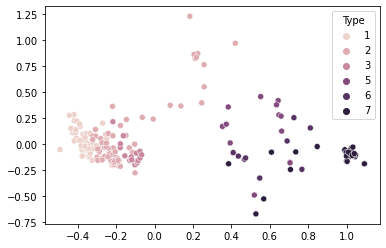

In [11]:
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=main_df['Type'])

# 3. Model Implementation

In [12]:
# from sklearn.model_selection import train_test_split

X = main_df.drop('Type', axis=1)
y = main_df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 121)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((171, 9), (43, 9), (171,), (43,))

In [13]:
# from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,algorithm='brute')
knn.fit(X_train,y_train)
print('Test Score: {:.4f}'.format(knn.score(X_test,y_test)))

Test Score: 0.5581


In [14]:
# from sklearn.pipeline import Pipeline

pipeline = Pipeline([('MinMaxScaling',MinMaxScaler()),
                    ('PCA',PCA(n_components=6)),
                    ('KNN',KNeighborsClassifier(n_neighbors=5,algorithm='brute'))])


pipeline.fit(X_train,y_train)
print('Test Score: {:.4f}'.format(pipeline.score(X_test,y_test)))

Test Score: 0.5581
